In [1]:
import pandas as pd
import numpy as np
from backtest.backtest import EasyBacktest

- prepare signal dataframe
- make sure the columns is ["sigdate", "signal"]

In [2]:
signal = pd.read_csv("./benchmark_data_2_cluster.csv", parse_dates=["Date"])
signal = signal[["Date", "label"]]
signal.columns = ["sigdate", "signal"]
signal.head()

,sigdate,signal
0,2015-03-31,0
1,2015-04-02,1
2,2015-04-07,0
3,2015-04-09,1
4,2015-04-10,1


- initialize the backtester

In [3]:
b = EasyBacktest(signal=signal, start_date="2018-01-01", end_date="2019-12-31", strategy="l2", fillna=True, start_cash=1e6)

"""
signal: DataFrame, columns=["sigdate", "signal"]
start_date: str, yyyy-mm-dd, the start date of backtest
end_date: str, yyyy-mm-dd, the end date of backtest
strategy: str, type of strategy, default ls2
    - "l2": long-out_of_market strategy with 2 clusters
    - "l3": long-out_of_market strategy with 3 clusters
    - "ls2": long-short strategy with 2 clusters
    - "ls3": long-short strategy with 3 clusters
fillna: bool, whether fill nan value in signal. if the signal is nan, then hold cash. default True
start_cash: float, default 1million
"""

'\nsignal: DataFrame, columns=["sigdate", "signal"]\nstart_date: str, yyyy-mm-dd, the start date of backtest\nend_date: str, yyyy-mm-dd, the end date of backtest\nstrategy: str, type of strategy, default ls2\n    - "l2": long-out_of_market strategy with 2 clusters\n    - "l3": long-out_of_market strategy with 3 clusters\n    - "ls2": long-short strategy with 2 clusters\n    - "ls3": long-short strategy with 3 clusters\nfillna: bool, whether fill nan value in signal. if the signal is nan, then hold cash. default True\nstart_cash: float, default 1million\n'

- run the backtester and get result

start date: 		2018-01-01 00:00:00
end date: 		2019-12-31 00:00:00
day count: 		503
start cash: 		1000000.0
cumulative return: 	0.5191245886740523
annualized return: 	0.23304011808035674
annualized sharpe: 	1.985274834866194
annualized IR: 	0.9425179444561809
annualized sortino: 	1.5084368924568874
calmar ratio: 	2.12746182381263
max drawndown: 	0.1095390363633999


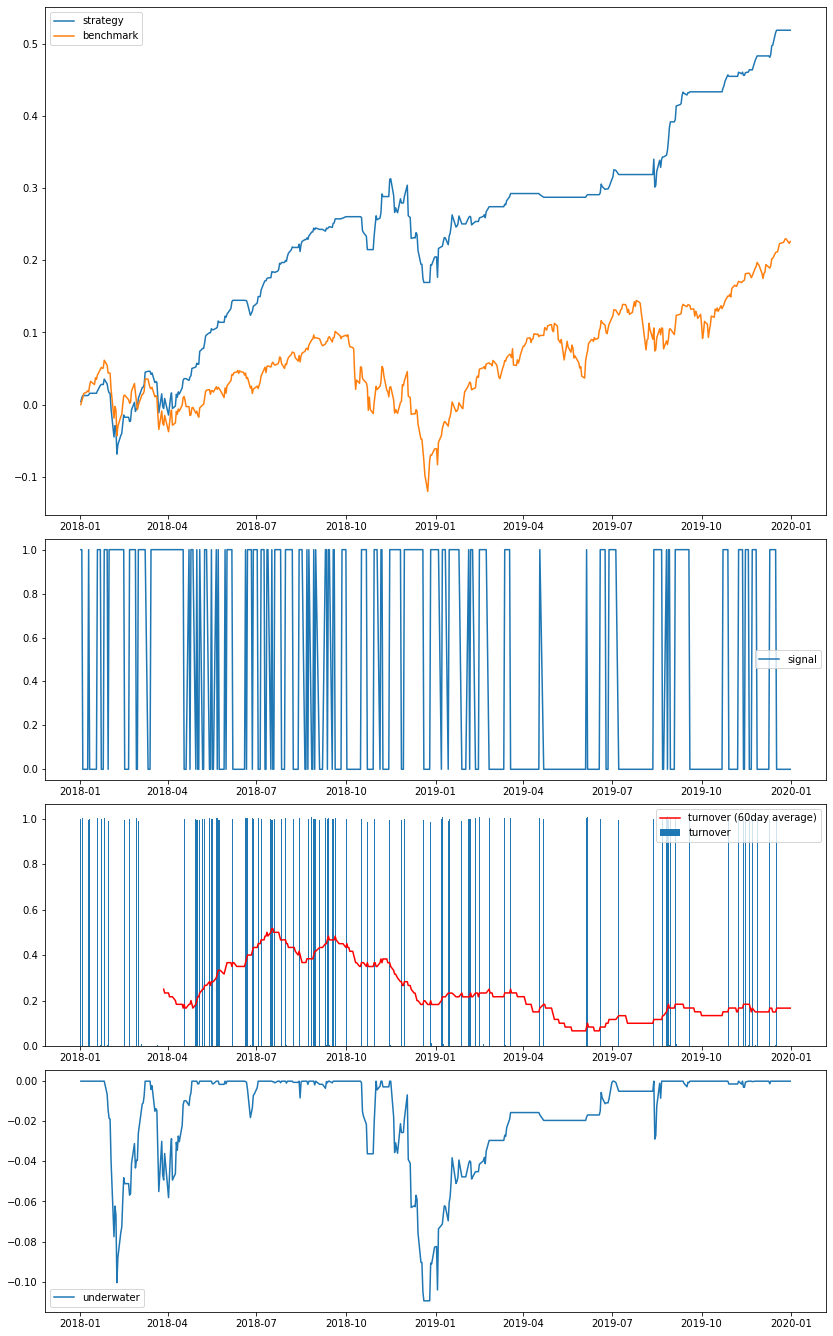

In [4]:
b.run()

- other functions & attributes

In [7]:
"""
holding
    pd.DataFrame, columns=["share", "price", "value"], index is date
        records daily holding

trade
    pd.DataFrame, columns=["sigdate", "share", "price"]
        records every trade

summary
    pd.DataFrame, columns=["cash", "value", "tot_asset"], index is date
        records every day's amount of cash, value in IWV, and total asset value

plot_cumulative_ret()
    plot cumulative return series
    
_calc_cumulative_ret()
    return a cumulative return series
    
plot_daily_ret()
    plot daily return series
    
_calc_daily_ret()
    return daily return series
    
_calc_ann_ret()
    return annualized arithmetic mean return

calc_comp_ann_ret()
    reutrn annualized compound mean return

calc_sharpe(rf=0)
    reutrn annualized sharpe ratio
    :param rf: float, risk-free rate, default 0
    
calc_ir(benchmark)
    return annualized infomation-ratio
    :param benchmark: pd.DataFrame, benchmark price series
        just use self.quote.close series

calc_sortino(rf=0)
    return sortino ratio
    :param rf: float, risk-free rate, default 0

calc_calmar()
    return calmar ratio

_calc_drawdown()
    return underwater series (negative number)

calc_maxdrawdown()
    return maxdrawdown (positive number)
    
plot_maxdrawdown()
    plot underwater series
    
plot_signal()
    plot signal series
    
plot_turnover()
    plot turnover series

"""

'\nholding\n    pd.DataFrame, columns=["share", "price", "value"], index is date\n        records daily holding\n\ntrade\n    pd.DataFrame, columns=["sigdate", "share", "price"]\n        records every trade\n\nsummary\n    pd.DataFrame, columns=["cash", "value", "tot_asset"], index is date\n        records every day\'s amount of cash, value in IWV, and total asset value\n\nplot_cumulative_ret()\n    plot cumulative return series\n    \n_calc_cumulative_ret()\n    return a cumulative return series\n    \nplot_daily_ret()\n    plot daily return series\n    \n_calc_daily_ret()\n    return daily return series\n    \n_calc_ann_ret()\n    return annualized arithmetic mean return\n\ncalc_comp_ann_ret()\n    reutrn annualized compound mean return\n\ncalc_sharpe(rf=0)\n    reutrn annualized sharpe ratio\n    :param rf: float, risk-free rate, default 0\n    \ncalc_ir(benchmark)\n    return annualized infomation-ratio\n    :param benchmark: pd.DataFrame, benchmark price series\n        just use s